# **1. Introduction**

# **2. Data Import** 
Simply modify the data path to load your data

**Library Imports**

In [192]:
!pip install sklearn

In [193]:
!pip install imbalanced-learn==0.5

In [194]:
import pandas as pd
import numpy as np
import io

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

from numpy import where
from imblearn.over_sampling import SMOTE

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import BorderlineSMOTE

from collections import Counter

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dropout, Flatten, Dense

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [195]:
# Data path setting
train_data_path = '/CreditCard_train.csv' # change to your local file location
test_data_path = '/CreditCard_test.csv'   # change to your local file location

In [199]:
# df_train = pd.read_csv(io.StringIO(uploaded_train['CreditCard_train.csv'].decode('utf-8')), header=1)
# df_test = pd.read_csv(io.StringIO(uploaded_test['CreditCard_test.csv'].decode('utf-8')), header=1)
df_train = pd.read_csv(train_data_path, header=1)
df_test = pd.read_csv(test_data_path, header=1)

In [200]:
# From outside colab
# df_train = pd.read_csv(path + 'CreditCard_train.csv', header=1) # pass the second line in the CSV file as column names

df_train.rename(columns={'PAY_0':'PAY_1'}, inplace=True) # change strange (inconsistent) column name 'PAY_0'
df_train.rename(columns={'default payment next month':'default'}, inplace=True) # shorten the name of the target column
df_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,80000,1,2,1,25,1,2,2,0,0,0,80906,82789,80903,80215,63296,49854,3800,6,3636,2646,2000,1830,0
23996,23997,20000,1,2,1,25,0,0,0,0,0,0,14447,15455,17562,17322,17119,17350,1552,2659,1419,606,500,1000,0
23997,23998,10000,1,2,2,26,0,0,0,0,0,0,8882,9933,9825,17506,16608,9176,1300,2200,1300,320,1820,1000,0
23998,23999,20000,1,5,2,26,0,0,0,0,0,-2,20564,20284,19394,39950,0,0,3055,1467,1096,1000,0,0,0


In [201]:
# check the ratio of train-test split
print('train:', df_train.shape[0] / (df_train.shape[0] + df_test.shape[0]))
print('test:', df_test.shape[0] / (df_train.shape[0] + df_test.shape[0]))

train: 0.8
test: 0.2


Train-test-split is 8:2.

# **3. Data Exploration and Transformation**

## **3.1 Data Exploration**

In [202]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         24000 non-null  int64
 1   LIMIT_BAL  24000 non-null  int64
 2   SEX        24000 non-null  int64
 3   EDUCATION  24000 non-null  int64
 4   MARRIAGE   24000 non-null  int64
 5   AGE        24000 non-null  int64
 6   PAY_1      24000 non-null  int64
 7   PAY_2      24000 non-null  int64
 8   PAY_3      24000 non-null  int64
 9   PAY_4      24000 non-null  int64
 10  PAY_5      24000 non-null  int64
 11  PAY_6      24000 non-null  int64
 12  BILL_AMT1  24000 non-null  int64
 13  BILL_AMT2  24000 non-null  int64
 14  BILL_AMT3  24000 non-null  int64
 15  BILL_AMT4  24000 non-null  int64
 16  BILL_AMT5  24000 non-null  int64
 17  BILL_AMT6  24000 non-null  int64
 18  PAY_AMT1   24000 non-null  int64
 19  PAY_AMT2   24000 non-null  int64
 20  PAY_AMT3   24000 non-null  int64
 21  PAY_AMT4   2

No Missing Values. All variables have numerical values (int64).

Check undocumented labels

In [203]:
# check the values of categorical variable in training set are well-documented
print('SEX:', sorted(df_train['SEX'].unique()))
print('EDUCATION:', sorted(df_train['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_train['MARRIAGE'].unique()))
print('PAY_1:', sorted(df_train['PAY_1'].unique()))
print('PAY_2:', sorted(df_train['PAY_2'].unique()))
print('PAY_3:', sorted(df_train['PAY_3'].unique()))
print('PAY_4:', sorted(df_train['PAY_4'].unique()))
print('PAY_5:', sorted(df_train['PAY_5'].unique()))
print('PAY_6:', sorted(df_train['PAY_6'].unique()))
print('default:', sorted(df_train['default'].unique()))

SEX: [1, 2]
EDUCATION: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE: [0, 1, 2, 3]
PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default: [0, 1]


Undocumented categories existed in both training and testing set:

EDUCATION: 0, 5, 6  
MARRIAGE: 0  
PAY_1 to PAY_6: -2, 0

Count the number of rows for each undocumented label¶


In [204]:
# create a DataFrame to hold the results
undocumented_labels = ['EDUCATION == 0','EDUCATION == 5','EDUCATION == 6','MARRIAGE == 0','PAY_n == -2', 'PAY_n == 0']
counts = pd.DataFrame(index=undocumented_labels, columns=['Training'])
counts

,Training
EDUCATION == 0,NaN
EDUCATION == 5,NaN
EDUCATION == 6,NaN
MARRIAGE == 0,NaN
PAY_n == -2,NaN
PAY_n == 0,NaN


In [205]:
# EDUCATION, training set
counts.loc['EDUCATION == 0', 'Training'] = df_train[df_train['EDUCATION'] == 0].shape[0]
counts.loc['EDUCATION == 5', 'Training'] = df_train[df_train['EDUCATION'] == 5].shape[0]
counts.loc['EDUCATION == 6', 'Training'] = df_train[df_train['EDUCATION'] == 6].shape[0]

# MARRIAGE, training set
counts.loc['MARRIAGE == 0', 'Training'] = df_train[df_train['MARRIAGE'] == 0].shape[0]

# PAY_1 to PAY_6, training set
counts.loc['PAY_n == -2', 'Training'] = df_train[(df_train['PAY_1'] == -2) | (df_train['PAY_2'] == -2) | 
                                                 (df_train['PAY_3'] == -2) | (df_train['PAY_4'] == -2) | 
                                                 (df_train['PAY_5'] == -2) | (df_train['PAY_6'] == -2)].shape[0]
counts.loc['PAY_n == 0', 'Training'] = df_train[(df_train['PAY_1'] == 0) | (df_train['PAY_2'] == 0) | 
                                                (df_train['PAY_3'] == 0) | (df_train['PAY_4'] == 0) | 
                                                (df_train['PAY_5'] == 0) | (df_train['PAY_6'] == 0)].shape[0]

counts

,Training
EDUCATION == 0,11
EDUCATION == 5,207
EDUCATION == 6,37
MARRIAGE == 0,41
PAY_n == -2,5185
PAY_n == 0,16929


Solution: (Will be dealt in Data Transformation Phase)

EDUCATION: categorise 0, 5, 6 as 4 (others)  
others may refer to education level either higher than graduate school or lower than high school.  
MARRIAGE: categorise 0 as 3 (others)  
PAY_1 to PAY_6: keep -2 and categorise 0 as -1 (pay duly)

Check outliers in numerical variables

In [206]:
# bill statement description
df_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()
# alternative demo: histogram

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [207]:
print('Negative BILL_AMT in training set:', df_train[(df_train['BILL_AMT1'] < 0) | (df_train['BILL_AMT2'] < 0) |
                                                     (df_train['BILL_AMT3'] < 0) | (df_train['BILL_AMT4'] < 0) |
                                                     (df_train['BILL_AMT5'] < 0) | (df_train['BILL_AMT6'] < 0)].shape[0])

Negative BILL_AMT in training set: 1496


There are negative values for bill statement in both training set (1496 rows)
We are not going to convert negatives to zero

2. Check extremely large or small values

In [208]:
# given credit description
df_train[['LIMIT_BAL']].describe()

,LIMIT_BAL
count,24000.000000
mean,165495.986667
std,129128.744855
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


In [209]:
# previous payment description
df_train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()\
                                        .apply(lambda s: s.apply(lambda x: format(x, 'f'))) # suppress scientific notation
# alternative demo: histogram

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,5542.912917,5815.336208,4969.266000,4743.480042,4783.486042,5189.399042
std,15068.576072,20797.031923,16095.614340,14883.269990,15270.405279,17630.371990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,800.000000,379.000000,279.750000,244.000000,60.750000
50%,2100.000000,2000.000000,1702.500000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5000.000000,4347.250000,4000.000000,4005.000000,4000.000000
max,505000.000000,1684259.000000,896040.000000,497000.000000,417990.000000,528666.000000


LIMIT_BAL, BILL_AMT and PAY_AMT all have a very broad range. Need to check if these are outliers.
Method: Check if the amount of previous payment (PAY_AMT) & bill statement (BILL_AMT) lie within the 'sensible' range of given credit (LIMIT_BAL). Choose LIMIT_BAL values below 5th percentile or above 95th percentile.

In [210]:
# investigate the percentiles for LIMIT_BAL, PAY_AMT and BILL_AMT
percentiles = []
variables = ['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for var in variables:
    percentiles.append(list(np.percentile(df_train[var], i) for i in range(5,100,10)))

pd.DataFrame(data=percentiles, index=variables, columns=['5th','15th','25th','35th','45th','55th','65th','75th','85th','95th'])

,5th,15th,25th,35th,45th,55th,65th,75th,85th,95th
LIMIT_BAL,20000.0,50000.00,50000.00,80000.00,120000.00,150000.00,200000.00,240000.00,300000.00,430000.00
PAY_AMT1,0.0,0.00,1000.00,1500.00,2000.00,2550.00,3510.40,5000.00,8000.00,18243.85
PAY_AMT2,0.0,0.00,800.00,1379.00,1885.55,2390.90,3300.00,5000.00,7784.15,19000.15
PAY_AMT3,0.0,0.00,379.00,1000.00,1424.10,2000.00,3000.00,4347.25,6800.00,16513.55
PAY_AMT4,0.0,0.00,279.75,764.65,1100.00,1920.00,2728.35,4000.00,6200.00,16000.00
PAY_AMT5,0.0,0.00,244.00,780.00,1170.00,2000.00,2832.70,4005.00,6251.15,15963.75
PAY_AMT6,0.0,0.00,60.75,690.00,1065.00,1911.90,2711.00,4000.00,6100.00,17398.10
BILL_AMT1,0.0,815.00,3631.50,9245.90,17706.20,28347.00,46009.85,65779.50,105939.05,197600.00
BILL_AMT2,0.0,495.00,3098.50,8760.30,17385.00,27619.45,43981.00,62761.25,101462.40,191542.10
BILL_AMT3,0.0,390.00,2773.50,8600.55,16985.55,26011.90,40181.05,59298.00,97224.80,184792.90


In [211]:
# Check outliers: 
# 1. Select the rows where the LIMIT_BAL value is below 5th percentile or above 95th percentile. 
# 2. Regard LIMIT_BAL as the credit base, check the rows where BILL_AMT or PAY_EMT exceed 2 * LIMIT_BAL
data = df_train[(df_train['LIMIT_BAL'] < np.percentile(df_train['LIMIT_BAL'], 5)) | 
                (df_train['LIMIT_BAL'] > np.percentile(df_train['LIMIT_BAL'], 95))][variables]
    
data_out_of_range = []

for i in data.index.values.tolist():
    limit_bal = df_train.loc[i, 'LIMIT_BAL']
    upper_limit = 2 * limit_bal

    if (upper_limit < df_train.loc[i, 'BILL_AMT1']) | (upper_limit < df_train.loc[i, 'BILL_AMT2']) |\
       (upper_limit < df_train.loc[i, 'BILL_AMT3']) | (upper_limit < df_train.loc[i, 'BILL_AMT4']) |\
       (upper_limit < df_train.loc[i, 'BILL_AMT5']) | (upper_limit < df_train.loc[i, 'BILL_AMT6']) |\
       (upper_limit < df_train.loc[i, 'PAY_AMT1']) | (upper_limit < df_train.loc[i, 'PAY_AMT2']) |\
       (upper_limit < df_train.loc[i, 'PAY_AMT3']) | (upper_limit < df_train.loc[i, 'PAY_AMT4']) |\
       (upper_limit < df_train.loc[i, 'PAY_AMT5']) | (upper_limit < df_train.loc[i, 'PAY_AMT6']):
            data_out_of_range.append(i)
    
print('Number of outliers:', len(data_out_of_range))
outliers = df_train.loc[data_out_of_range, variables].sort_values(by=['LIMIT_BAL'])
outliers

Number of outliers: 5


,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
5843,10000,1475,780,0,31250,0,0,885,1475,780,390,780,390
7508,10000,2134,1000,2500,122,0,0,53095,54562,5428,7928,6091,0
7688,10000,10400,1000,0,20200,200,0,219,9110,9797,-10433,9767,9067
16504,10000,1500,5000,4000,2000,22400,0,8525,5141,5239,7911,17890,10000
5296,500000,4366,1684259,121831,97670,379267,26759,125,-18088,1664089,121757,97115,377217


We filtered out 5 records. In these records, either one of the previous payments or one of the bill statements or both exceeded the twice of the range of their given credit. However, if we take a closer look at these records, we will notice that the previous payments and the bill statements are relatively balanced in general and most of their values lied with in the given credit. Therefore, we cannot regard them as anomalies.

Calculate Ratios

0.22375


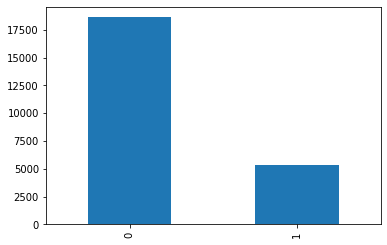

In [212]:
# default probability in the training set
print(df_train['default'].sum() / len(df_train['default']))
# alternative: draw bar chart
df_train['default'].value_counts().plot.bar()

22% Default, 78% No default in the training set.

Check single variable's distribution

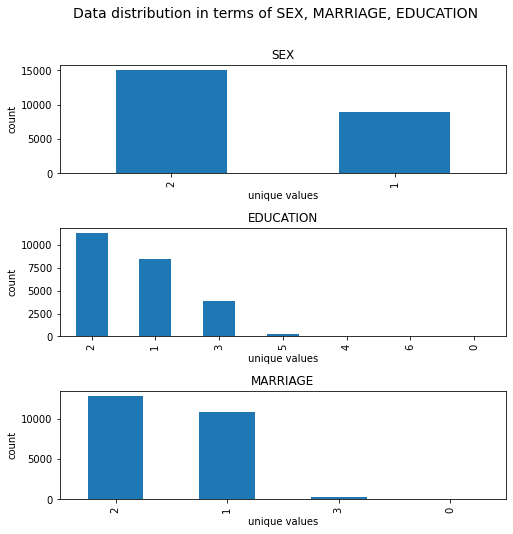

In [213]:
# draw bar charts
fig, axes = plt.subplots(nrows=3, figsize=(8,8))
fig.suptitle('Data distribution in terms of SEX, MARRIAGE, EDUCATION', fontsize=14)

df_train['SEX'].value_counts().plot.bar(ax=axes[0])
df_train['EDUCATION'].value_counts().plot.bar(ax=axes[1])
df_train['MARRIAGE'].value_counts().plot.bar(ax=axes[2])
axes[0].set_title('SEX')
axes[1].set_title('EDUCATION')
axes[2].set_title('MARRIAGE')

for ax in axes.flat:
    ax.set(xlabel='unique values', ylabel='count')

plt.subplots_adjust(hspace=0.5)
plt.show()

More females than males.
Education level is mostly graduate school and university.
Most of the clients are either marrined or single (less frequent the other status).

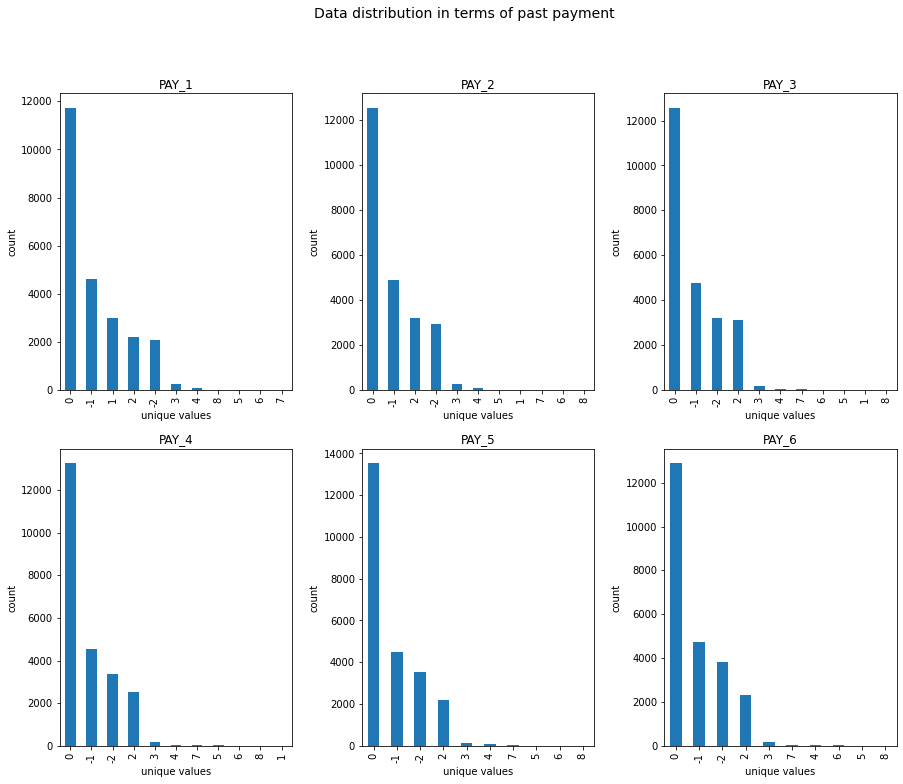

In [214]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
fig.suptitle('Data distribution in terms of past payment', fontsize=14)

df_train['PAY_1'].value_counts().plot.bar(ax=axes[0,0])
df_train['PAY_2'].value_counts().plot.bar(ax=axes[0,1])
df_train['PAY_3'].value_counts().plot.bar(ax=axes[0,2])
df_train['PAY_4'].value_counts().plot.bar(ax=axes[1,0])
df_train['PAY_5'].value_counts().plot.bar(ax=axes[1,1])
df_train['PAY_6'].value_counts().plot.bar(ax=axes[1,2])

axes[0,0].set_title('PAY_1')
axes[0,1].set_title('PAY_2')
axes[0,2].set_title('PAY_3')
axes[1,0].set_title('PAY_4')
axes[1,1].set_title('PAY_5')
axes[1,2].set_title('PAY_6')

for ax in axes.flat:
    ax.set(xlabel='unique values', ylabel='count')

plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


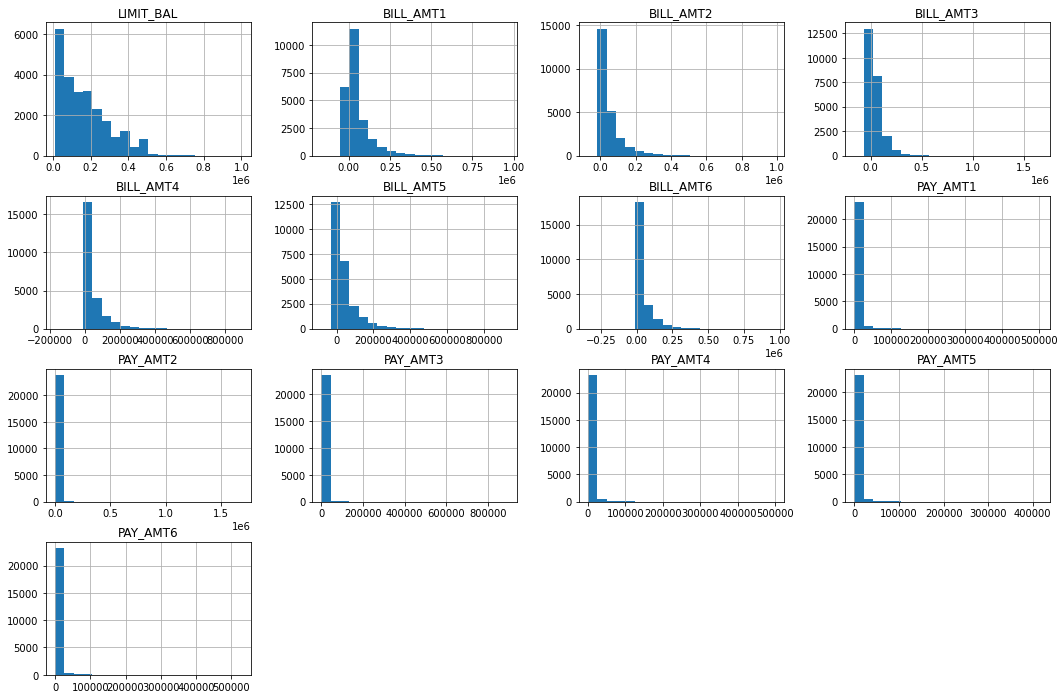

In [215]:
# draw histograms
fig= plt.figure(figsize = (18,12))
ax = fig.gca()

df_train[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].hist(ax=ax, bins=20)
plt.show()

[Text(0, 0.5, 'count'), Text(0.5, 0, 'ages')]

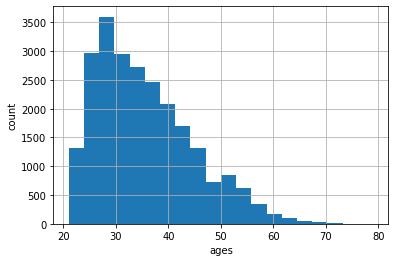

In [216]:
ax = df_train['AGE'].hist(bins=20)
ax.set(xlabel='ages', ylabel='count')

Feature correlation test

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

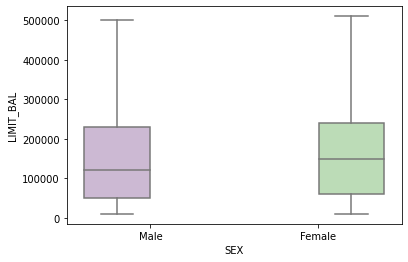

In [217]:
# check the credit limit distribution vs. sex
ax = sns.boxplot(x="SEX", y="LIMIT_BAL", hue="SEX",data=df_train, palette="PRGn",showfliers=False)
ax.legend_.remove()

# interpret the unique values in xticks
xlabels = [item.get_text() for item in ax.get_xticklabels()]
sex_encoder = {'1':'Male', '2':'Female'}
xlabels = [sex_encoder.get(xlabels[i]) for i in range(len(xlabels))]
ax.set_xticklabels(xlabels)

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q1 and mean.



In [218]:
# Features correlation for numerical variables
def check_correlation(variables, title:str):
    plt.figure(figsize = (10,8))
    plt.title(title + ' (Apr 2005 to Sep 2005)' + '\nCorrelation Plot')
    corr = df_train[variables].corr()
    sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
    plt.show()

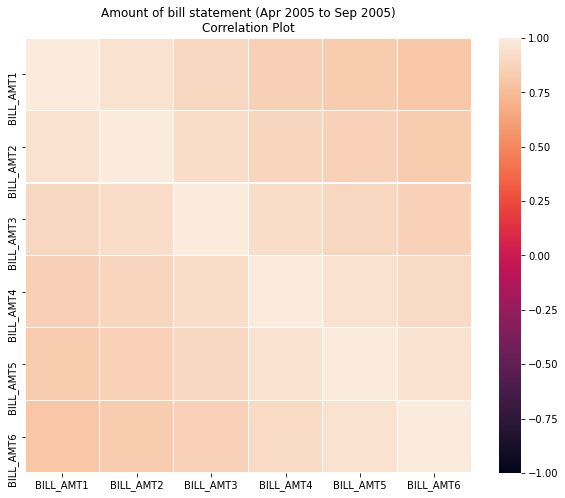

In [219]:
# check the correlation of Amount of bill statement
check_correlation(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], 'Amount of bill statement')

Correlation is decreasing as the distance between months increases. Lowest correlation is between Sept (BILL_AMT1) & April (BILL_AMT6).



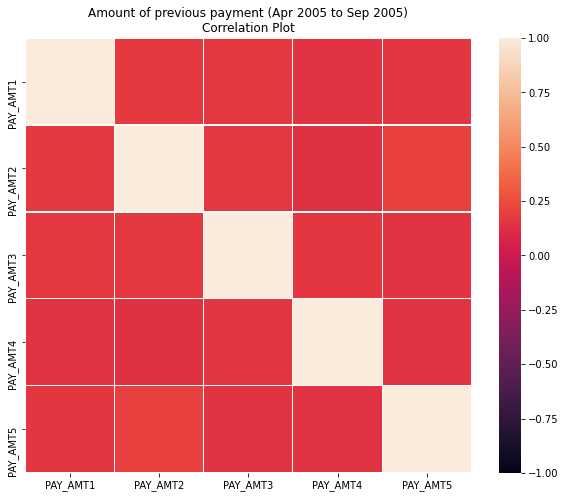

In [220]:
# check the correlation of Amount of previous payment
check_correlation(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5'], 'Amount of previous payment')

There are no correlations between amounts of previous payments.



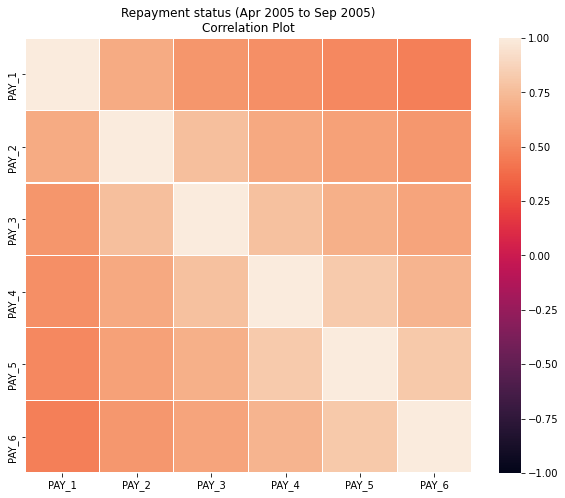

In [221]:
# check the correlation between Repayment status
check_correlation(['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'Repayment status')

Correlation is decreasing as the distance between months increases. Lowest correlation is between Sept (BILL_AMT1) & April (BILL_AMT6).



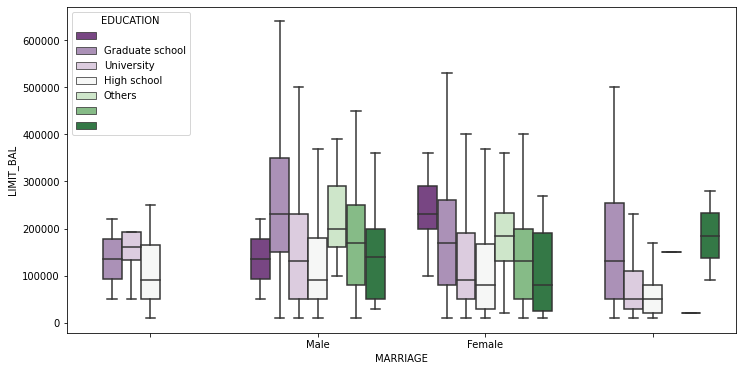

In [222]:
# credit amount limit distribution grouped by marriage status and education level
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(ax=ax, x='MARRIAGE', y='LIMIT_BAL', hue='EDUCATION', data=df_train, palette="PRGn",showfliers=False)

# interpret the unique values (of EDUCATION) in legend
education_encoder = {'1':'Graduate school', '2':'University', '3':'High school', '4': 'Others'}
L = plt.legend()
L.set_title('EDUCATION')
for i in range(len(L.get_texts())):
    legend_text = L.get_texts()[i].get_text()
    L.get_texts()[i].set_text(education_encoder.get(legend_text))

# interpret the unique values (of MARRIAGE) in xticks
xlabels = [item.get_text() for item in ax.get_xticklabels()]
marriage_encoder = {'1':'Married', '2':'Single', '3':'Others'}
xlabels = [sex_encoder.get(xlabels[i]) for i in range(len(xlabels))]
ax.set_xticklabels(xlabels)

plt.show()

In general, higher education level has higher credit among all marriage groups. Married people have higher credit than Single than Others among all education levels.

Feature Importance Test
- Use of any classification model and feed raw data without any splitting and cross validation. This is purely to get a general understanding of importance of features and to set a certain goal for data transformation as part of exploration

In [223]:
!pip install xgboost

In [224]:
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


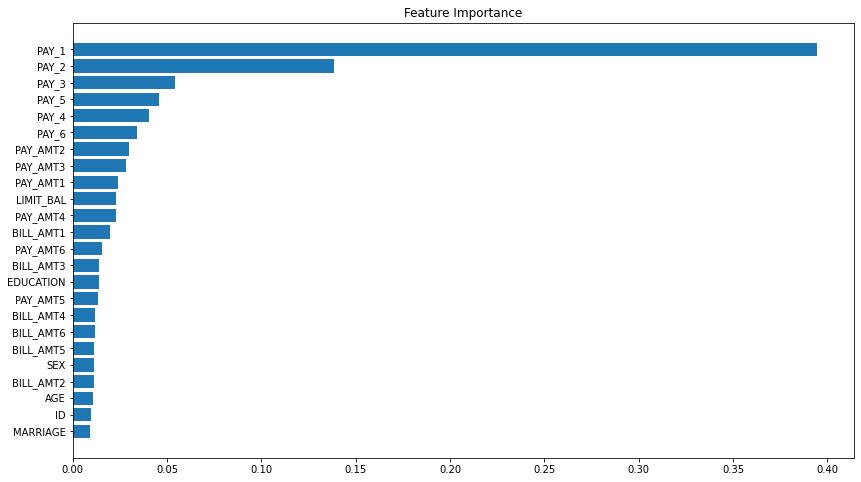

In [225]:
# split training data into X and y
X = df_train.drop(['default'], axis=1)
y = df_train[['default']]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# Get feature name place number
features_num = [i for i in range(len(model.feature_importances_))]
importance = model.feature_importances_.tolist()
feature_names = X.columns

# Sorting
matched = zip(features_num, feature_names, importance)
sorted_importance = sorted(matched, key=lambda x: x[2])       # sort by importance

sorted_features_importance = list(map(lambda x: x[2], sorted_importance))
sorted_features_names = list(map(lambda x: x[1], sorted_importance))

fig = plt.figure(figsize=(14, 8))
plt.barh(features_num, sorted_features_importance, tick_label=sorted_features_names)
plt.title('Feature Importance')
plt.show()

1. PAY_N is the most important feature, so we will not change these features during transformation phase.
2. Generally, PAY_N > PAY_AMT >LIMIT_BAL > BILL_AMT. Therefore we can try to use BILL_AMTs and try making stronger and semantically meaningful features by combining weak features.
3. Among 4 personal information, Education is the most important feature.
4. On the other hand, Marriage, Age, Sex are contributing very little to the classification. 

## **3.2 Data Transformation**

### **Data Cleaning**

In [226]:
def rename_pay_default(df):
    df = df.rename(columns={'PAY_0':'PAY_1'})
    df = df.rename(columns={'default payment next month':'default'})
    return df

def clean_edu(df):
    df.loc[(df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6), 'EDUCATION'] = 4
    return df

def clean_marriage(df):
    df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3
    return df

def clean_pay(df):
    for i in range(1, 7):
        df.loc[(df[f'PAY_{i}'] == 0), f'PAY_{i}'] = -1
    return df

### **Feature Processing**

In [227]:
def drop_id(df):
    df = df.drop(['ID'], axis=1)
    return df

def combine_gender_marital(df):
    df['SEX_MAR'] = df.SEX * df.MARRIAGE
    df = df.drop(['SEX', 'MARRIAGE'], axis=1)
    return df

def make_age_bins(df):
    df['AgeBin'] = 0 # placeholder column
    df.loc[((df['AGE'] < 30)) , 'AgeBin'] = 1
    df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
    df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
    df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
    df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
    df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
    
    df = df.drop(['AGE'], axis=1)
    return df

def get_closeness(df):
    for i in range(1, 7):
        df[f'Closeness_{i}'] = (df.LIMIT_BAL - df[f'BILL_AMT{i}']) #/ df.LIMIT_BAL
    
    return df

def get_diff_of_totals(df):
    df['diff'] = 0   # Make placeholder
    
    bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
    pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
    
    for index, row in df.iterrows():
        bill_df = df.loc[index, bill_cols]
        pay_df = df.loc[index, pay_cols]

        bill_sum = np.sum(bill_df.values)
        pay_sum = np.sum(pay_df.values)

        df.loc[index, 'diff'] = bill_sum - pay_sum
        
    return df

def drop_bill_amt(df):
    df = df.drop([f'BILL_AMT{i}' for i in range(1, 7)], axis=1)
    return df

def drop_pay_amt(df):
    df = df.drop([f'PAY_AMT{i}' for i in range(1, 7)], axis=1)
    return df

def drop_age(df):
    df = df.drop(['AGE'], axis=1)
    return df

### **Data Preprocessing Pipeline**

In [228]:
def processing_pipline(df):
    ### Cleaning ###
    """
    Available functions:
    rename_pay, clean_edu, clean_marriage, clean_pay
    """
    for func in [rename_pay_default, clean_edu, clean_marriage, clean_pay]:
        df = func(df)
    
    print("Cleaned Data")
    
    ### Feature Engineering ###
    """
    Available functions:
    drop_id, combine_gender_marital, make_age_bins, get_closeness, get_diff_of_totals, drop_bill_amt, drop_pay_amt, drop_age
    """
    for func in [drop_id, combine_gender_marital, make_age_bins, get_closeness, get_diff_of_totals]:
        df = func(df)
    
    print("Transformed Features")
    
    return df

In [229]:
transformed_train = processing_pipline(df_train)
transformed_test = processing_pipline(df_test)

Cleaned Data
Transformed Features
Cleaned Data
Transformed Features


In [230]:
transformed_train = transformed_train[['LIMIT_BAL', 'EDUCATION', 'SEX_MAR', 'AgeBin', \
                    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',\
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',\
                    'Closeness_1', 'Closeness_2', 'Closeness_3', 'Closeness_4','Closeness_5', 'Closeness_6',\
                    'diff', 'default'
                   ]]
transformed_test = transformed_test[['LIMIT_BAL', 'EDUCATION', 'SEX_MAR', 'AgeBin', \
'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\
'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',\
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',\
'Closeness_1', 'Closeness_2', 'Closeness_3', 'Closeness_4','Closeness_5', 'Closeness_6',\
'diff', 'default'
]]
transformed_train
transformed_test

,LIMIT_BAL,EDUCATION,SEX_MAR,AgeBin,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,diff,default
0,50000,2,2,1,2,2,-1,-1,-1,-1,51246,49758,48456,44116,21247,20066,8,2401,2254,2004,704,707,-1246,242,1544,5884,28753,29934,226811,0
1,60000,2,2,1,-1,-1,-1,-1,-1,-1,58072,59040,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120,1928,960,2584,4264,33042,31153,273294,1
2,400000,2,2,1,-1,-1,-1,-1,-1,-1,15330,8626,11470,10745,20737,9545,2501,10009,1437,1105,510,959,384670,391374,388530,389255,379263,390455,59932,0
3,20000,4,2,1,5,4,3,2,2,2,21673,21051,20440,19709,20113,19840,0,0,0,900,0,0,-1673,-1051,-440,291,-113,160,121926,0
4,50000,3,2,1,-1,-1,-2,-2,-1,-1,32590,-100,0,0,70,120,0,100,0,70,200,100,17410,50100,50000,50000,49930,49880,32210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,220000,3,1,2,-1,-1,-1,-1,-1,-1,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,31052,27185,11635,131996,188763,204020,682799,0
5996,150000,3,2,3,-1,-1,-1,-1,-1,-1,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,148317,148172,146498,141021,144810,150000,6692,0
5997,30000,2,2,2,4,3,2,-1,-1,-1,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,26435,26644,27242,9122,9418,10643,39196,1
5998,80000,3,1,3,1,-1,-1,-1,-1,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,81645,1621,3696,27226,68145,31056,119430,1


### **Dealing with an imabalanced dataset <br>**
<font color='red'>
Sorry i dont know how to put reference... i just leave it here for now ... sorry  <br>
Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
</font>

The ratio of default to non-default is 2:8

Counter({0: 18630, 1: 5370})
Probability of default is 1 in traing data:  0.22375


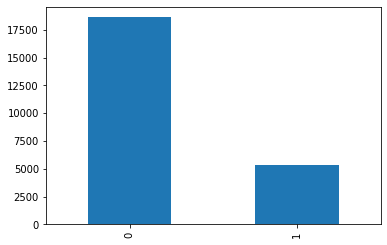

In [231]:
print(Counter(transformed_train['default']))

print("Probability of default is 1 in traing data: ", transformed_train['default'].sum() / len(transformed_train['default']))
transformed_train['default'].value_counts().plot.bar()

In order to compare the performance of the **SMOTE** and **Borerline-SMOTE**, we generalised an imbalanced classes with 2 features

Simulated data with 10000 samples and the radio of 0 and 1 is 0.99.

Counter({0: 9900, 1: 100})


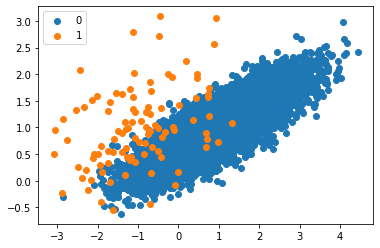

In [232]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Handle the data by using SMOTE method and plot the scatter graph:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 9900, 1: 9900})


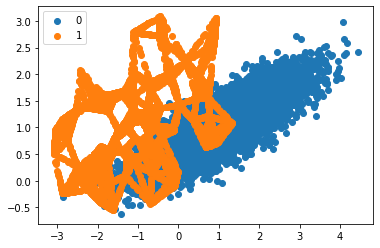

In [233]:
oversample = SMOTE()
X_test_smote, y_test_smote = oversample.fit_sample(X, y)
counter = Counter(y_test_smote)
print(counter)
for label, _ in counter.items():
    row_ix = where(y_test_smote == label)[0]
    pyplot.scatter(X_test_smote[row_ix, 0], X_test_smote[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


From the graph, we can observe that all the minority samples are used to generate new synthetic data.

To improve the algorithm, we use Boarderline-SMOTE to regenerate the syntnetic samples:


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 9900, 1: 9900})


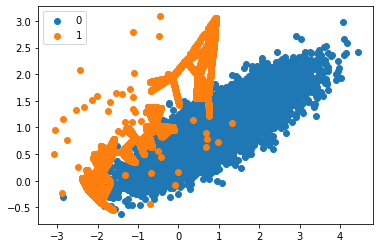

In [234]:
oversample = BorderlineSMOTE(random_state=42, kind="borderline-1")
X_test_BS, y_test_BS = oversample.fit_sample(X, y)
counter = Counter(y_test_BS)
print(counter)
for label, _ in counter.items():
    row_ix = where(y_test_BS == label)[0]
    pyplot.scatter(X_test_BS[row_ix, 0], X_test_BS[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

After applying Borderline-SMOTE, minorty samples which are far away from the decision boundary are not taken to generate new synthetic samples. Minority samples which are overlapped with the majority samples are not used to generate new synthetic samples as well. 

As a result, we decided to apply borderline-SMOTE on Credit Card Default data:

In [235]:
# borderline_SMOTE provided data with less probability to overfit
def Borderline_SMOTE(df):
    oversample = BorderlineSMOTE(random_state=42, kind="borderline-1")
    y_train = df['default'].copy()
    X_train = df.copy()
    X_train = X_train.drop(['default'], axis = 1)
    X_borderline_smote, y_borderline_smote = oversample.fit_sample(X_train, y_train)
    counter = Counter(y_borderline_smote)
    print(counter)
    print("Probability of default is 1: ", y_borderline_smote.sum() / len(y_borderline_smote))
    print(X_borderline_smote.shape)
    
    return X_borderline_smote, y_borderline_smote

In [236]:
X_train_oversampled, y_train_oversampled = Borderline_SMOTE(transformed_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 18630, 0: 18630})
Probability of default is 1:  0.5
(37260, 29)


In [237]:
pd.DataFrame(X_train_oversampled, columns=['LIMIT_BAL', 'EDUCATION', 'SEX_MAR', 'AgeBin', \
                    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',\
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',\
                    'Closeness_1', 'Closeness_2', 'Closeness_3', 'Closeness_4','Closeness_5', 'Closeness_6',\
                    'diff'
                   ])

,LIMIT_BAL,EDUCATION,SEX_MAR,AgeBin,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,diff
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,16087,16898,19311,20000,20000,20000,7015
1,120000,2,4,1,-1,2,-1,-1,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,117318,118275,117318,116728,116545,116739,12077
2,90000,2,4,2,-1,-1,-1,-1,-1,-1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,60761,75973,76441,75669,75052,74451,90635
3,50000,2,2,2,-1,-1,-1,-1,-1,-1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,3010,1767,709,21686,21041,20453,222946
4,50000,2,1,4,-1,-1,-1,-1,-1,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,41383,44330,14165,29060,30854,30869,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37255,30000,1,2,1,0,2,2,0,0,0,1148,1794,1083,1083,1189,1002,773,0,0,691,105,0,28851,28205,28916,28916,28810,28997,5731
37256,50000,2,1,2,2,2,2,2,2,2,39086,39865,40698,41430,42113,43921,1709,1781,1700,1573,2642,0,10913,10134,9301,8569,7886,6078,237708
37257,210000,1,2,3,-1,-1,-1,-1,-1,-1,216,216,216,216,258,216,216,216,216,258,175,216,209783,209783,209783,209783,209741,209783,41
37258,490000,1,1,3,-1,-1,-1,-1,-1,-1,12444,6985,5292,3222,2733,8791,6985,5556,3222,2733,8791,3486,477555,483014,484707,486777,487266,481208,8693


In [238]:
pd.DataFrame(y_train_oversampled, columns=['default'])

,default
0,1
1,1
2,0
3,0
4,0
...,...
37255,1
37256,1
37257,1
37258,1


### **Split Test Data**

In [239]:
x_test = transformed_test.copy()
x_test = x_test.drop(['default'], axis = 1)

y_test = transformed_test['default'].copy()

### **Feature scaling: Normalisation or Standardization**

NOTE:  
Feature scaling of train data (SMOTEed) has to be done with test data with the same scale

In [240]:
### Feature scaling ###
scaler = MinMaxScaler().fit(X_train_oversampled)
x_train, x_test = scaler.transform(X_train_oversampled), scaler.transform(x_test)

y_train = y_train_oversampled

print("scaled numerical values")

scaled numerical values


# **4. Methodology**

In [242]:
# used in 4.1, 4.2, 4.3
def train_and_cross_validate(model, n_splits=5):
    n_iter = 1      # this var is made just to keep track of the number of iteration
    kfold = KFold(n_splits=n_splits)
    cv_accuracy = []

    for train_idx, val_idx in kfold.split(x_train):
        x_train_cv, x_val = x_train[train_idx], x_train[val_idx]
        y_train_cv, y_val = y_train[train_idx], y_train[val_idx]

        model.train(x_train_cv, y_train_cv)
        pred = model.predict(x_val)

        accuracy = np.round(accuracy_score(y_val, pred), 3)

        print("Iteration : {}, Cross-Validation Accuracy : {}".format(n_iter, accuracy))

        n_iter += 1

        cv_accuracy.append(accuracy)

    print("Average accuracy : ", np.mean(cv_accuracy))

## **4.1 Adaboost**

### **4.1.1 Model Training**

In [243]:
class adaboost(object):
    def __init__(self):
        # build the model
        self.model  = ensemble.AdaBoostClassifier(n_estimators=200,learning_rate=0.001)

    def train(self,x_train,y_train):
        # training
        self.model.fit(x_train,y_train)

    def predict(self,x_test):
        # predicting
        y_pred = self.model.predict(x_test)

        return y_pred

In [244]:
adaboost_model = adaboost()

In [245]:
train_and_cross_validate(adaboost_model)

Iteration : 1, Cross-Validation Accuracy : 0.766
Iteration : 2, Cross-Validation Accuracy : 0.77
Iteration : 3, Cross-Validation Accuracy : 0.79
Iteration : 4, Cross-Validation Accuracy : 0.731
Iteration : 5, Cross-Validation Accuracy : 0.713
Average accuracy :  0.754


### **4.1.2 Results**

In [246]:
# prediction
y_pred_adaboost = adaboost_model.predict(x_test)

In [247]:
# Obtain the f1 score and report for three methods
print(f1_score(y_test,y_pred_adaboost))

0.5122336227308603


In [248]:
print(classification_report(y_test,y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4734
           1       0.51      0.51      0.51      1266

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000



## **4.2 Random Forest**

### **4.2.1 Model Traning**

In [249]:
class random_forest(object):
    def __init__(self):
        # create the model
        self.model = ensemble.BaggingClassifier(KNeighborsClassifier(), n_estimators=200, max_samples=0.5,max_features=0.5)

    def train(self,x_train,y_train):
        # training
        self.model.fit(x_train,y_train)

    def predict(self,x_test):
        # predicting
        y_pred = self.model.predict(x_test)
        return y_pred

In [250]:
random_forest_model = random_forest()

In [251]:
train_and_cross_validate(random_forest_model)

Iteration : 1, Cross-Validation Accuracy : 0.744
Iteration : 2, Cross-Validation Accuracy : 0.749
Iteration : 3, Cross-Validation Accuracy : 0.765
Iteration : 4, Cross-Validation Accuracy : 0.873
Iteration : 5, Cross-Validation Accuracy : 0.85
Average accuracy :  0.7962


### **4.2.2 Results**

In [252]:
# prediction
y_pred_random_forest = random_forest_model.predict(x_test)

In [253]:
# Obtain the f1 score and report for three methods
print(f1_score(y_test,y_pred_random_forest))

0.47188851513695335


In [254]:
print(classification_report(y_test,y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4734
           1       0.60      0.39      0.47      1266

    accuracy                           0.82      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## **4.3 GBRT**

### **4.3.1 Model Training**

In [255]:
class GBRT(object):
    def __init__(self):
        # create the model
        self.model = ensemble.GradientBoostingClassifier(n_estimators=200)

    def train(self,x_train,y_train):
        # training
        self.model.fit(x_train,y_train)

    def predict(self,x_test):
        # predicting
        y_pred = self.model.predict(x_test)
        return y_pred

In [256]:
GBRT_model = GBRT()

In [257]:
train_and_cross_validate(GBRT_model)

Iteration : 1, Cross-Validation Accuracy : 0.766
Iteration : 2, Cross-Validation Accuracy : 0.767
Iteration : 3, Cross-Validation Accuracy : 0.794
Iteration : 4, Cross-Validation Accuracy : 0.856
Iteration : 5, Cross-Validation Accuracy : 0.837
Average accuracy :  0.8039999999999999


### **4.3.2 Results**

In [258]:
# prediction
y_pred_GBRT = GBRT_model.predict(x_test)

In [259]:
# Obtain the f1 score and report for three methods
print(f1_score(y_test,y_pred_GBRT))

0.5070555032925682


In [260]:
print(classification_report(y_test,y_pred_GBRT))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4734
           1       0.63      0.43      0.51      1266

    accuracy                           0.83      6000
   macro avg       0.74      0.68      0.70      6000
weighted avg       0.81      0.83      0.81      6000



## **4.4 Artificial Neural Network (ANN)**

### **4.4.1 Data Preparation**

In [261]:
x_train_ann = x_train.copy()
y_train_ann = y_train.copy()

In [262]:
# y_train_ann = train[['default']]
y_train_ann = to_categorical(y_train_ann, num_classes = 2) # make it as a categorial one-hot vector
y_train_ann

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [264]:
x_train_ann, x_val_ann, y_train_ann, y_val_ann = train_test_split(x_train_ann, y_train_ann, test_size = 0.1, shuffle=True)
x_train_ann.shape, x_val_ann.shape, y_train_ann.shape, y_val_ann.shape

((33534, 29), (3726, 29), (33534, 2), (3726, 2))

### **4.4.2 Model Training**

In [265]:
model = Sequential()

model.add(Dense(256, activation = "relu", input_shape=(29,)))
model.add(Dropout(0.25))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(16, activation = "relu"))

model.add(Dense(2, activation = "softmax"))

In [266]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               7680      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)               

In [267]:
optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [268]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [269]:
epochs = 50
batch_size = 64

# Early Stopping
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
callback = EarlyStopping(monitor='loss', patience=3)

history = model.fit(x_train_ann, y_train_ann, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val_ann, y_val_ann), verbose = 2, callbacks=[callback])

Epoch 1/50
524/524 - 2s - loss: 0.5659 - accuracy: 0.7259 - val_loss: 0.5134 - val_accuracy: 0.7587
Epoch 2/50
524/524 - 1s - loss: 0.5185 - accuracy: 0.7591 - val_loss: 0.4933 - val_accuracy: 0.7614
Epoch 3/50
524/524 - 1s - loss: 0.5037 - accuracy: 0.7644 - val_loss: 0.4790 - val_accuracy: 0.7681
Epoch 4/50
524/524 - 1s - loss: 0.4873 - accuracy: 0.7673 - val_loss: 0.4661 - val_accuracy: 0.7754
Epoch 5/50
524/524 - 1s - loss: 0.4772 - accuracy: 0.7696 - val_loss: 0.4585 - val_accuracy: 0.7689
Epoch 6/50
524/524 - 1s - loss: 0.4671 - accuracy: 0.7758 - val_loss: 0.4502 - val_accuracy: 0.7746
Epoch 7/50
524/524 - 1s - loss: 0.4617 - accuracy: 0.7781 - val_loss: 0.4460 - val_accuracy: 0.7786
Epoch 8/50
524/524 - 1s - loss: 0.4569 - accuracy: 0.7790 - val_loss: 0.4368 - val_accuracy: 0.7848
Epoch 9/50
524/524 - 1s - loss: 0.4516 - accuracy: 0.7840 - val_loss: 0.4390 - val_accuracy: 0.7925
Epoch 10/50
524/524 - 1s - loss: 0.4468 - accuracy: 0.7852 - val_loss: 0.4218 - val_accuracy: 0.8011

### **4.4.3 Results**

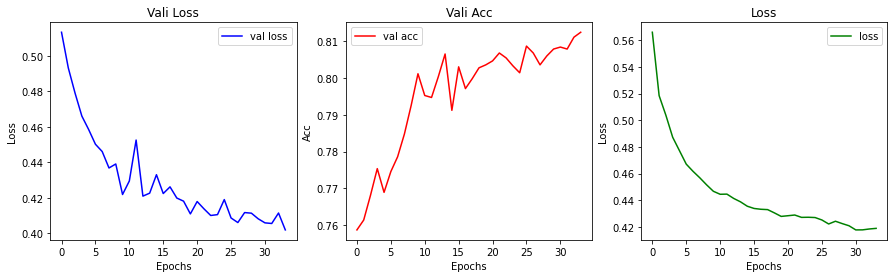

In [270]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].plot(history.history['val_loss'], color='b', label="val loss")
axes[0].set_title("Vali Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history.history['val_accuracy'], color='r', label="val acc")
axes[1].set_title("Vali Acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Acc")
axes[1].legend()

axes[2].plot(history.history['loss'], color='green', label="loss")
axes[2].set_title("Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.show()

In [271]:
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis = 1)
result = pd.Series(pred_classes, name="Label")

In [272]:
pred

array([[0.3667293 , 0.63327074],
       [0.6152833 , 0.3847167 ],
       [0.7352646 , 0.2647354 ],
       ...,
       [0.32185546, 0.6781445 ],
       [0.79942477, 0.2005752 ],
       [0.6555889 , 0.34441105]], dtype=float32)

In [273]:
pred_classes.sum()

1193

In [274]:
result

0       1
1       0
2       0
3       1
4       0
       ..
5995    0
5996    0
5997    1
5998    0
5999    0
Name: Label, Length: 6000, dtype: int64

In [275]:
from sklearn.metrics import f1_score,classification_report

In [276]:
f1_score(y_test, pred_classes)

0.508336722244815

In [277]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4734
           1       0.52      0.49      0.51      1266

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.79      0.80      0.80      6000



## **4.5 XGBoost**

# **5. Model Training & Validation**

# **6. Results**

# **7. Final Predictions on Test Set**